In [1]:
import os

os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import pandas as pd
import numpy as np
from yahoo_fin import stock_info as si
from datetime import datetime

# Define the symbol, start date, and end date

ticker = 'AAPL'  # yahoo ticker
StartDate = datetime(2022, 1,1)
FutureTimeSteps = 5

# Fetch historical stock data
StockData = si.get_data(ticker, start_date=StartDate)

# Check the shape of the data
print(StockData.shape)

StockData['TradeDate']=StockData.index

(602, 7)


In [2]:
FullData = StockData[['close']].values

from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc = MinMaxScaler()
DataScaler = sc.fit(FullData)
X = DataScaler.transform(FullData)

In [3]:
X_samples = list()
y_samples = list()

NumerOfRows = len(X)

TimeSteps = 10

for i in range(TimeSteps , NumerOfRows - FutureTimeSteps):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i:i+FutureTimeSteps]
    X_samples.append(x_sample)
    y_samples.append(y_sample)

X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)

y_data=np.array(y_samples)

In [4]:
TestingRecords = 5

X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]

TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]

In [5]:

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, InputLayer
 
# Initialising the RNN
regressor = Sequential()
 
# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor.add(InputLayer(shape = (TimeSteps, TotalFeatures)))
regressor.add(LSTM(units = 10, activation = 'relu', return_sequences=True))

# Adding the Second Second hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=True))

# Adding the Second Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))
 
 
# Adding the output layer
regressor.add(Dense(units = FutureTimeSteps))
 
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
 
##################################################
 
import time
# Measuring the time taken by the model to train
StartTime=time.time()
 
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

EndTime=time.time()
print("## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ##')

Epoch 1/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2696
Epoch 2/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0270
Epoch 3/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0155
Epoch 4/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0131
Epoch 5/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0127
Epoch 6/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0130
Epoch 7/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0138
Epoch 8/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0123
Epoch 9/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0119
Epoch 10/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0113
Epoch 11/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0114
Epoch 12/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0109
Epoch 13/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0118
Epoch 14/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0109
Epoch 15/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0

In [6]:
# Making predictions on test data
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
print('#### Predicted Prices ####')
print(predicted_Price)
 
# Getting the original price values for testing data
orig=y_test.reshape(y_test.shape[0], y_test.shape[1])
orig=DataScaler.inverse_transform(orig)
print('\n#### Original Prices ####')
print(orig)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
#### Predicted Prices ####
[[184.39465 185.2932  184.6201  184.61919 183.79756]
 [185.79695 186.45197 186.15207 185.79727 184.87257]
 [187.79236 188.29613 188.07678 187.5999  186.67752]
 [189.73831 190.08163 190.05547 189.37088 188.37814]
 [190.5908  190.90092 190.52167 190.02298 189.34558]]

#### Original Prices ####
[[186.27999878 187.42999268 189.72000122 189.83999634 189.86999512]
 [187.42999268 189.72000122 189.83999634 189.86999512 191.03999329]
 [189.72000122 189.83999634 189.86999512 191.03999329 192.3500061 ]
 [189.83999634 189.86999512 191.03999329 192.3500061  190.8999939 ]
 [189.86999512 191.03999329 192.3500061  190.8999939  186.88000488]]


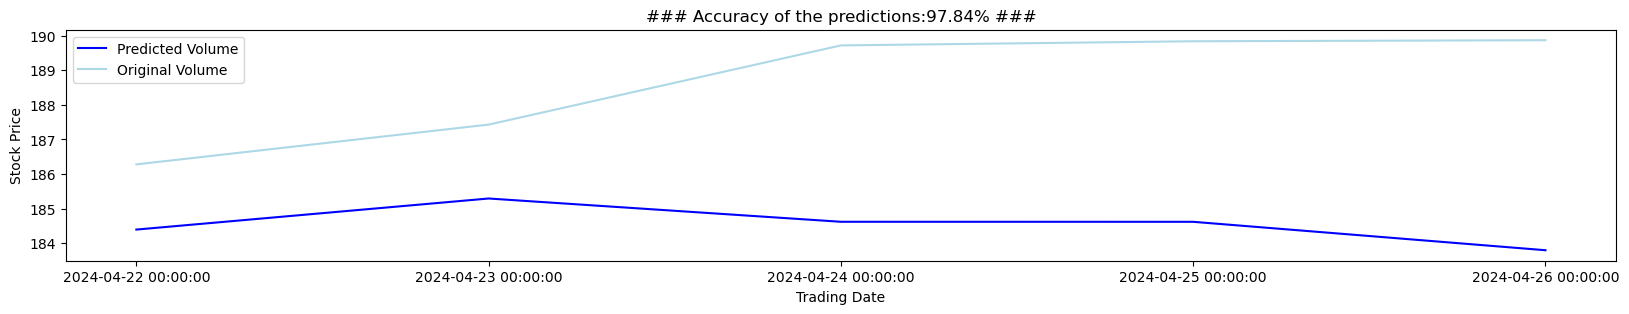

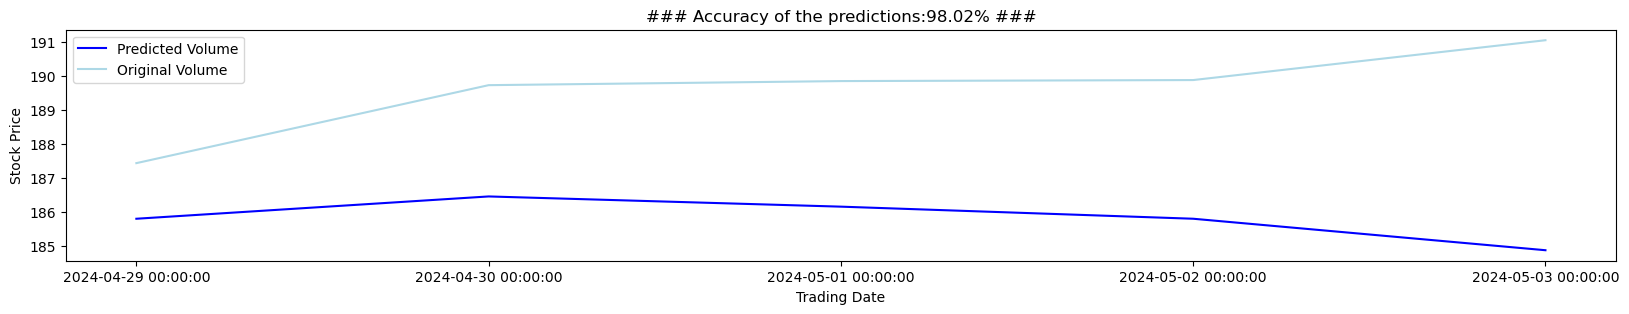

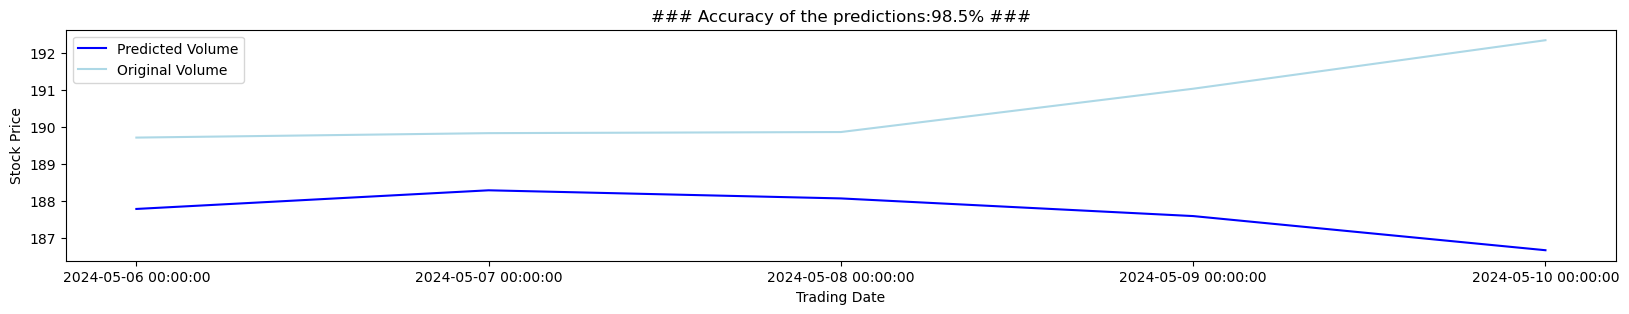

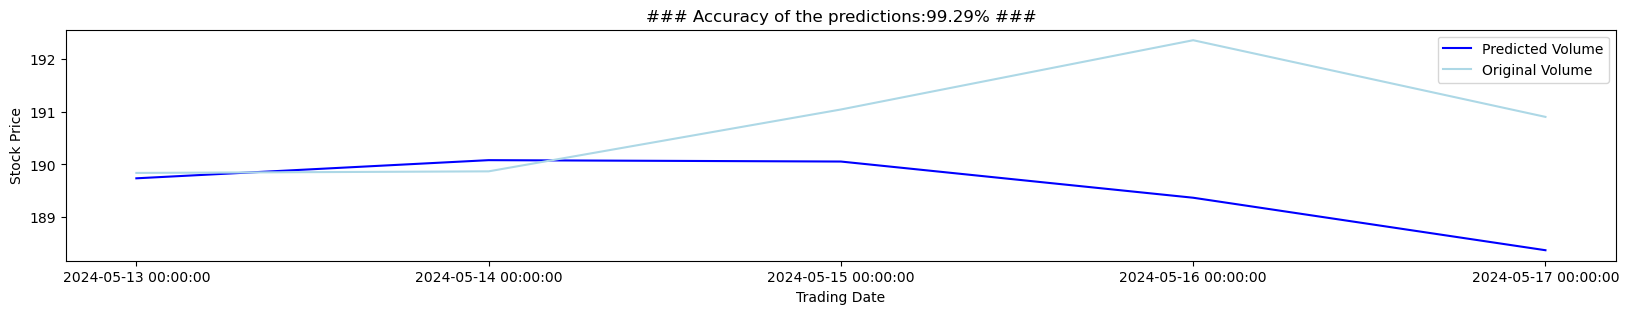

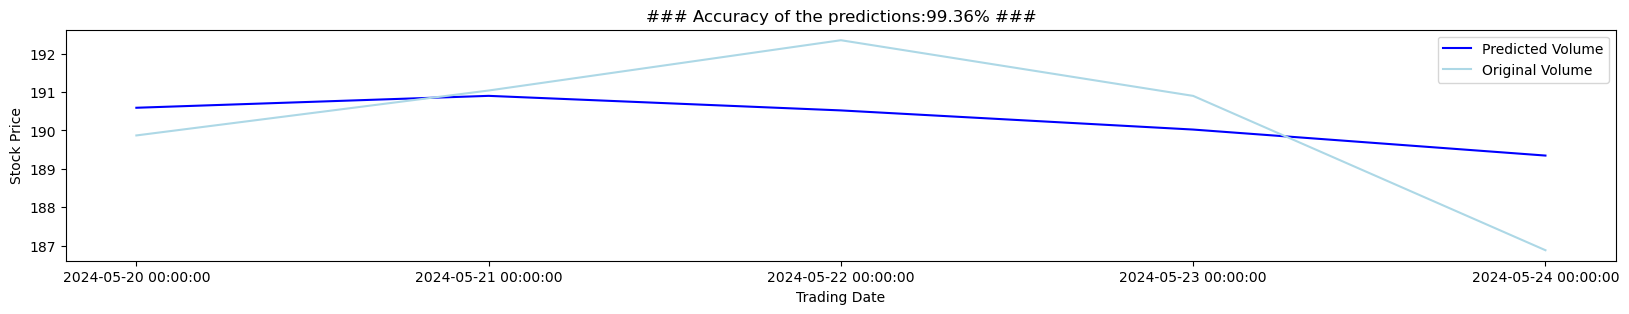

In [7]:
import matplotlib.pyplot as plt
 
for i in range(len(orig)):
    Prediction=predicted_Price[i]
    Original=orig[i]
    
    # Visualising the results
    plt.plot(Prediction, color = 'blue', label = 'Predicted Volume')
    plt.plot(Original, color = 'lightblue', label = 'Original Volume')
 
    plt.title('### Accuracy of the predictions:'+ str(100 - (100*(abs(Original-Prediction)/Original)).mean().round(2))+'% ###')
    plt.xlabel('Trading Date')
    
    startDateIndex=(FutureTimeSteps*TestingRecords)-FutureTimeSteps*(i+1)
    endDateIndex=(FutureTimeSteps*TestingRecords)-FutureTimeSteps*(i+1) + FutureTimeSteps
    TotalRows=StockData.shape[0]
 
    plt.xticks(range(FutureTimeSteps), StockData.iloc[TotalRows-endDateIndex : TotalRows-(startDateIndex) , :]['TradeDate'])
    plt.ylabel('Stock Price')
 
    plt.legend()
    fig=plt.gcf()
    fig.set_figwidth(20)
    fig.set_figheight(3)
    plt.show()

In [10]:
Last10DaysPrices = np.array(FullData[-10:])
Last10DaysPrices=Last10DaysPrices.reshape(-1, 1)

# Scaling the data on the same level on which model was trained
X_test=DataScaler.transform(Last10DaysPrices)

NumberofSamples=1
TimeSteps=X_test.shape[0]
NumberofFeatures=X_test.shape[1]
# Reshaping the data as 3D input
X_test=X_test.reshape(NumberofSamples,TimeSteps,NumberofFeatures)

# Generating the predictions for next 5 days
NextDaysPrice = regressor.predict(X_test)

# Generating the prices in original scale
NextDaysPrice = DataScaler.inverse_transform(NextDaysPrice)
NextDaysPrice

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[189.4353 , 188.79243, 188.0331 , 187.37206, 188.16064]],
      dtype=float32)